# 1. 패키지 임포트

In [1]:
import numpy as np
import pandas as pd
import folium
import pandas_profiling
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline
from tqdm import tqdm
import datetime
import json
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

mpl.rc('font', family='binggrae2')
mpl.rc('axes', unicode_minus=True)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 10000

# 2. 데이터 로드

In [2]:
path = 'C:/Users/user/Desktop/TodayLearn/TiL/Code/Project2/Projcet02/1_smart_card_data/'
df = pd.read_csv(f'{path}/smartcard_Chain.csv', encoding = 'cp949')

In [3]:
# 데이터 shape 파악
print(df.shape)

(8206179, 23)


In [4]:
# 데이터 결측치 확인
df.isnull().sum()

card_name               0
Bus                     0
Subway                  0
on_area_name            0
on_lon                  0
on_lat                  0
on_dong                 0
on_hour                 0
on_minute               0
on_second               0
off_area_name           0
off_lon                 0
off_lat                 0
off_dong                0
off_hour                0
off_minute              0
off_second              0
no_transfer             0
total_distance          0
total_time              0
route_id          3398018
Haversine               0
Circuity            72738
dtype: int64

<AxesSubplot:>

findfont: Font family ['binggrae2'] not found. Falling back to DejaVu Sans.
findfont: Font family ['binggrae2'] not found. Falling back to DejaVu Sans.
findfont: Font family ['binggrae2'] not found. Falling back to DejaVu Sans.


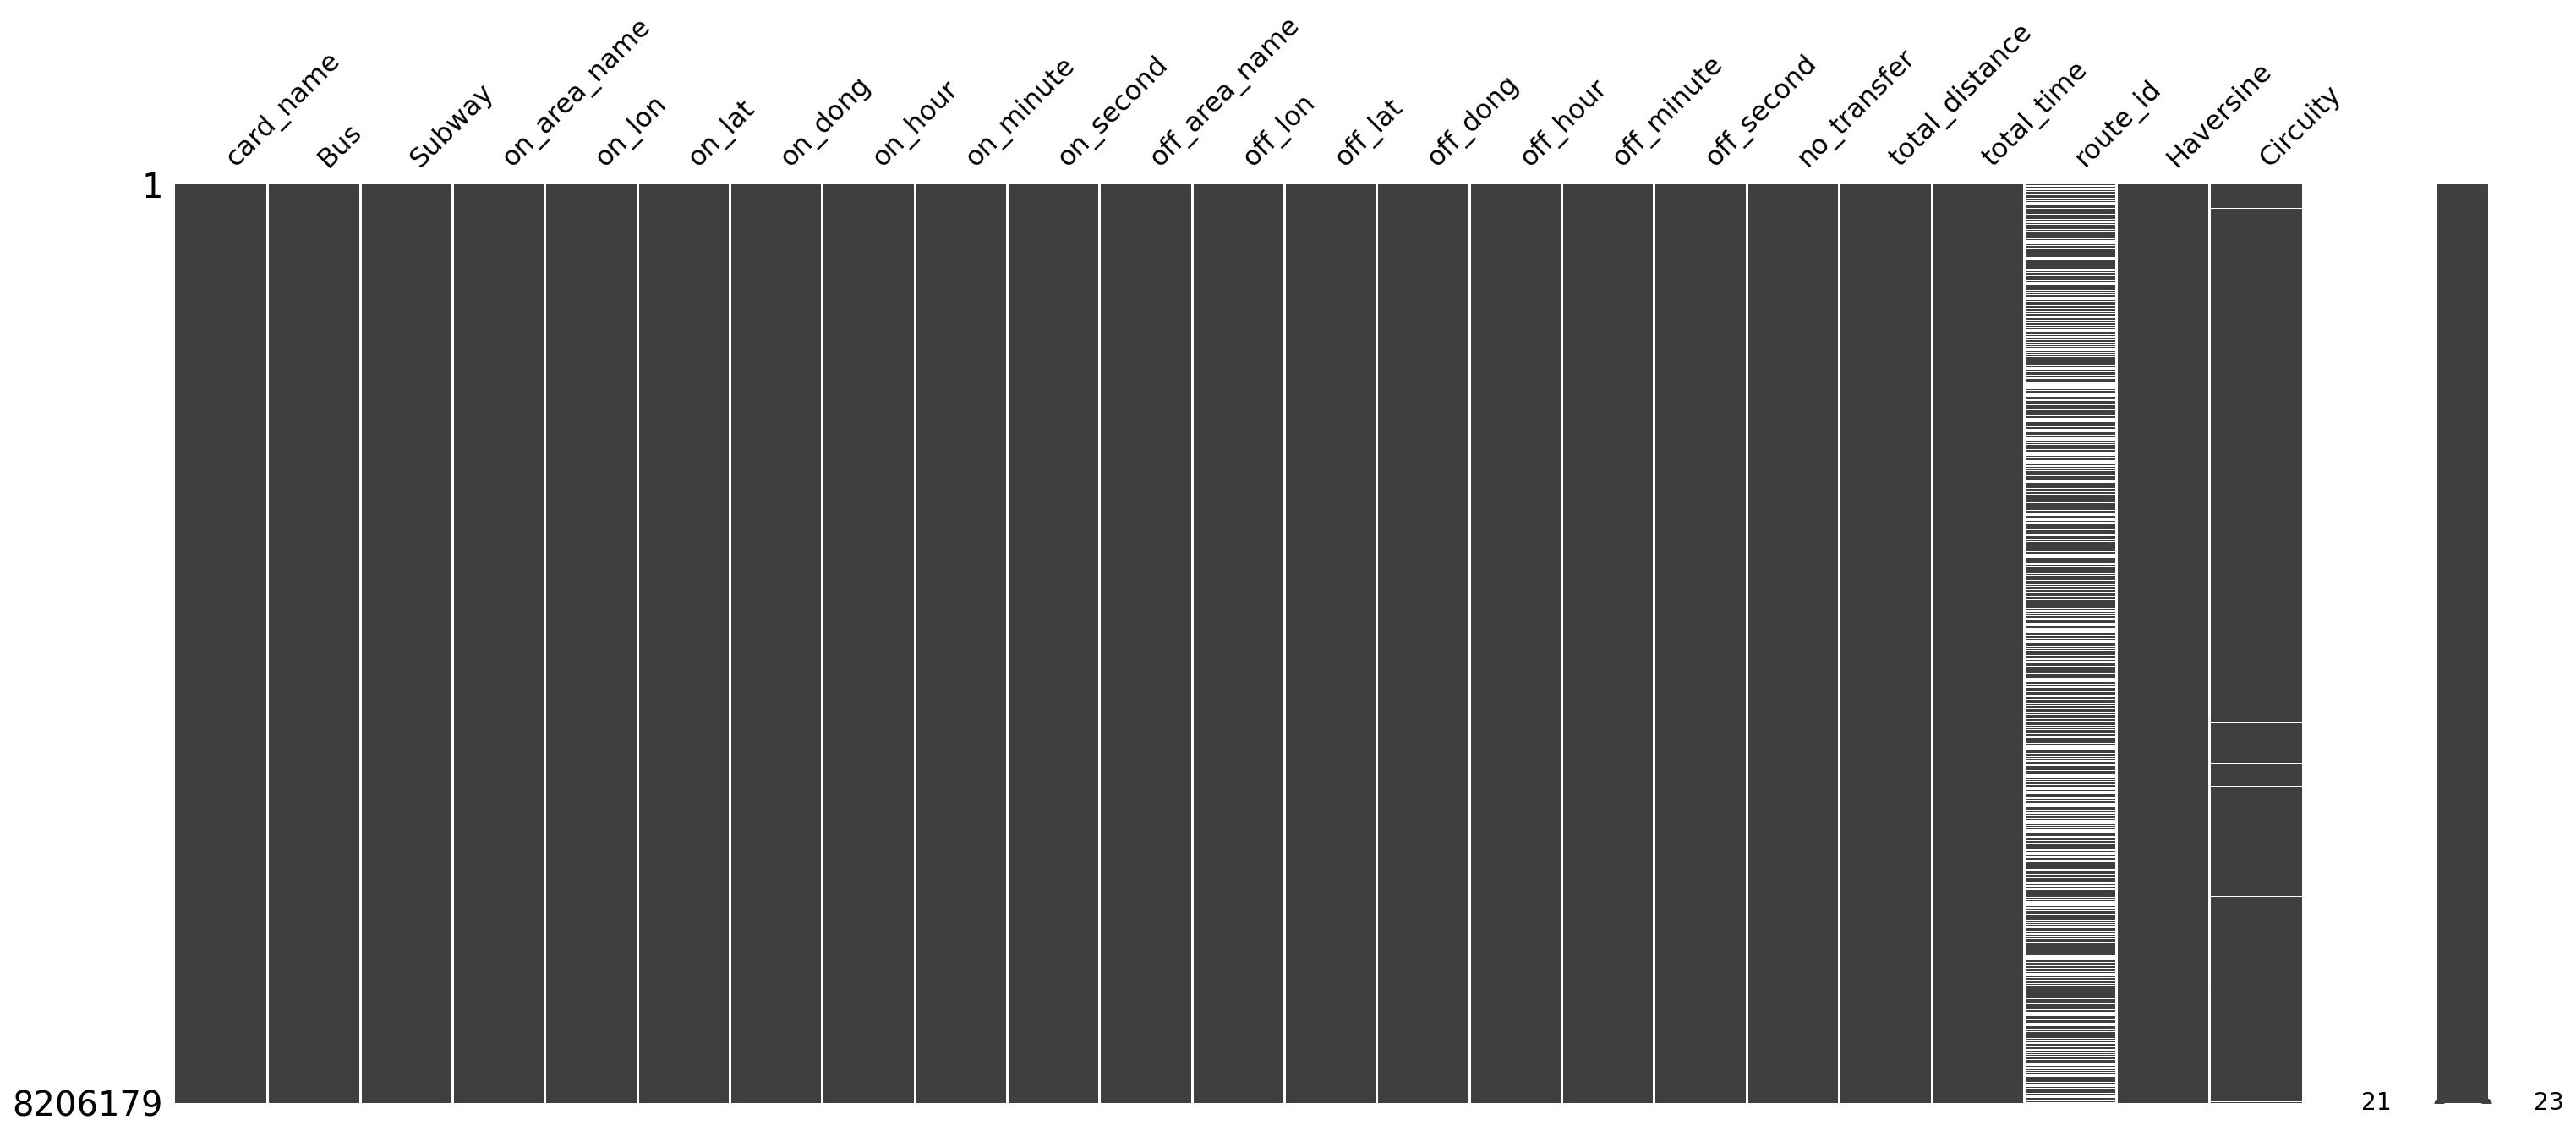

In [5]:
# 데이터 결측치 시각화
msno.matrix(df)

# 3. 데이터 정제
- df : 원본데이터
- df_copy = df.copy()

In [6]:
df_copy = df.copy()

In [7]:
df_copy.head(10)

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity
0,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,영등포시장역,126.905118,37.522694,1119074,12,42,8,충무로역,126.993624,37.561135,1102060,13,16,20,0,11000,2052,NaN,8897.367673,1.236321
1,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,충무로역,126.993624,37.561135,1102060,16,2,9,중곡역,127.084283,37.565891,1105057,16,36,50,0,9400,2081,NaN,8008.336598,1.173777
2,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,중곡역,127.084283,37.565891,1105057,18,22,39,선유도역,126.893294,37.538159,1119062,19,19,46,0,20100,3427,NaN,17116.783674,1.174286
3,+++19/4InCnN/eZXlK0pT7oFlp3qEbVXHX4NFSiyAN8=,True,False,LG전자.문래중,126.885883,37.520390,1119076,16,11,56,문래역,126.894412,37.519063,1119076,16,15,3,0,768,187,11110803.0,766.539891,1.001905
4,+++3lFnkOIxAPXhin+oeJBZJeI8l5KOhgxcjhFqGTlc=,True,False,강남구청.강남세무서,127.047293,37.518428,1123078,18,4,57,청담동래미안아파트,127.042912,37.517653,1123078,18,6,30,0,397,93,11110214.0,395.878621,1.002833
5,+++F6kFULTd2oQ7KiAe3olIQ0mzelgLbSx+q6rqtJqA=,True,False,중동초등학교,126.910317,37.566667,1114073,9,12,48,연희104고지앞.구성산회관,126.925082,37.566285,1113076,9,16,56,0,1457,248,11110027.0,1302.056387,1.118999
6,+++F6kFULTd2oQ7KiAe3olIQ0mzelgLbSx+q6rqtJqA=,True,False,홍대입구역,126.923352,37.556790,1114066,13,51,2,성산2교,126.913213,37.563907,1114072,13,55,24,0,1432,262,41110070.0,1193.729520,1.199602
7,+++Mu6n16tNt3pAX8k72E1UlIZXRqojexmEcPIaArto=,False,True,압구정역,127.028481,37.526492,1123077,14,57,34,회현역,126.978434,37.558734,1102052,15,19,1,0,6700,1287,NaN,5685.353574,1.178467
8,+++Mu6n16tNt3pAX8k72E1UlIZXRqojexmEcPIaArto=,False,True,을지로3가역,126.992593,37.566424,1101061,18,1,40,압구정역,127.028481,37.526492,1123077,18,16,6,0,6000,866,NaN,5452.191576,1.100475
9,+++PAYzWTdRTGJKcBiZ1g/w9Ik/WgyDTTve7H410Tbo=,False,True,창동역,127.047672,37.653205,1110063,9,51,57,미아사거리역,127.030084,37.613251,1109072,10,8,24,0,5700,987,NaN,4704.914692,1.211499


In [8]:
df_copy['on_time'] = df_copy['on_hour'].astype(str)+':'+df_copy['on_minute'].astype(str)+':'+df_copy['on_second'].astype(str)
df_copy['off_time'] = df_copy['off_hour'].astype(str)+':'+df_copy['off_minute'].astype(str)+':'+df_copy['off_second'].astype(str)
df_copy.head()

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,on_time,off_time
0,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,영등포시장역,126.905118,37.522694,1119074,12,42,8,충무로역,126.993624,37.561135,1102060,13,16,20,0,11000,2052,NaN,8897.367673,1.236321,12:42:8,13:16:20
1,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,충무로역,126.993624,37.561135,1102060,16,2,9,중곡역,127.084283,37.565891,1105057,16,36,50,0,9400,2081,NaN,8008.336598,1.173777,16:2:9,16:36:50
2,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,중곡역,127.084283,37.565891,1105057,18,22,39,선유도역,126.893294,37.538159,1119062,19,19,46,0,20100,3427,NaN,17116.783674,1.174286,18:22:39,19:19:46
3,+++19/4InCnN/eZXlK0pT7oFlp3qEbVXHX4NFSiyAN8=,True,False,LG전자.문래중,126.885883,37.520390,1119076,16,11,56,문래역,126.894412,37.519063,1119076,16,15,3,0,768,187,11110803.0,766.539891,1.001905,16:11:56,16:15:3
4,+++3lFnkOIxAPXhin+oeJBZJeI8l5KOhgxcjhFqGTlc=,True,False,강남구청.강남세무서,127.047293,37.518428,1123078,18,4,57,청담동래미안아파트,127.042912,37.517653,1123078,18,6,30,0,397,93,11110214.0,395.878621,1.002833,18:4:57,18:6:30


In [9]:
df_copy['Circuity'] = np.where(df_copy['Circuity'] == 0, np.nan, df_copy['Circuity'])
df_copy['Circuity'] = np.where(df_copy['Haversine'] == 0, np.nan, df_copy['Circuity'] )

In [10]:
df_copy.isnull().sum()

card_name               0
Bus                     0
Subway                  0
on_area_name            0
on_lon                  0
on_lat                  0
on_dong                 0
on_hour                 0
on_minute               0
on_second               0
off_area_name           0
off_lon                 0
off_lat                 0
off_dong                0
off_hour                0
off_minute              0
off_second              0
no_transfer             0
total_distance          0
total_time              0
route_id          3398018
Haversine               0
Circuity           114032
on_time                 0
off_time                0
dtype: int64

In [11]:
df_copy.shape

(8206179, 25)

In [12]:
# df_copy[df_copy['Circuity'] >2000] == np.nan
# df_copy.head(5)

In [13]:
df2 = df_copy[(df_copy['Circuity'] <= 10) & (df_copy['Circuity'] > 0)]

In [14]:
df_copy['route_id'].replace(np.nan, -1, inplace = True)

In [15]:
df_copy.dropna(inplace = True)

In [16]:
df_copy.isnull().sum()

card_name         0
Bus               0
Subway            0
on_area_name      0
on_lon            0
on_lat            0
on_dong           0
on_hour           0
on_minute         0
on_second         0
off_area_name     0
off_lon           0
off_lat           0
off_dong          0
off_hour          0
off_minute        0
off_second        0
no_transfer       0
total_distance    0
total_time        0
route_id          0
Haversine         0
Circuity          0
on_time           0
off_time          0
dtype: int64

In [17]:
df_copy[df_copy['Circuity'] > 10].head(10)

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,on_time,off_time
55,++/wPrFybiQiZVjn0QEZpNxMQ5tJuhYl5EBoQIU+OuQ=,True,False,미림여고.미림여자정보과학고,126.931333,37.465575,1121082,12,9,14,신우초등학교,126.931980,37.462322,1121082,12,56,12,2,7758,1888,11110912.0,366.197322,21.185300,12:9:14,12:56:12
1026,++TWA5N+lGMi8nXa7zuNZ6bbANK0b3AgTKly2ut3wzI=,True,False,구로4동우체국.고대구로병원정문,126.884217,37.490372,1117055,19,9,55,구로4동우체국.고대구로병원정문,126.884095,37.489860,1117071,19,50,53,1,1982,657,11110054.0,57.940492,34.207511,19:9:55,19:50:53
1248,++a5ImjmJKzJlSonE97O1tjk1D8zWTVq3W2pk28YvLc=,True,False,의릉입구,127.062165,37.603480,1106089,15,24,30,의릉입구,127.061940,37.603932,1106089,15,41,23,1,1297,304,11110970.0,54.027458,24.006312,15:24:30,15:41:23
1465,++hPZgI1dDUh2KC/Ow4fcusYxG6XVxdQjl1pwdV/Vwc=,True,False,만안구청,126.931215,37.387320,3104156,17,37,53,만안구청,126.930997,37.387080,3104156,18,16,43,1,2599,579,41110044.0,32.911186,78.970110,17:37:53,18:16:43
2150,+/0rpYi71nq8cxB1B+SQSLTF5Kjl1g5XDJLJticRlH0=,True,False,한티역,127.052142,37.498165,1123065,9,28,44,예림당아트홀.신한은행전산센터,127.044293,37.498223,1123065,10,17,58,1,8022,2581,11110420.0,692.461922,11.584753,9:28:44,10:17:58
2172,+/1ocBEpzsl33qoxqINfCuCckhjBf7SaTBzQYEQmamo=,True,False,방약국앞,127.085740,37.575997,1107054,18,23,26,용마산역,127.086662,37.573423,1107054,19,27,24,3,9404,2040,11110979.0,297.526451,31.607274,18:23:26,19:27:24
2202,+/3CXVqOGPs1XLrzVfIJxIw/NoBMR9twtrT82bK1IqQ=,True,True,신창동세방아파트,126.954955,37.535708,1103057,8,17,57,신창동세방아파트,126.954892,37.535837,1103057,9,7,47,4,6219,1714,11110897.0,15.382236,404.297534,8:17:57,9:7:47
2364,+/8dbe4qhOgeo+VrYzJ/fEe50hAxsVWaVo/Z/B7zS2Q=,True,False,천주교성령봉사회관.등불교회,126.907893,37.480792,1121072,8,11,48,KT구로지사,126.905593,37.479983,1118054,9,0,17,2,3790,947,41110043.0,221.995242,17.072438,8:11:48,9:0:17
2465,+/CdP1eKIPG0B+GL5vCzY4QsfkOq4BEKGEQfiLt/AXg=,True,False,숭례초교,127.035692,37.594807,1108084,13,6,21,숭례초등학교,127.036180,37.594357,1108084,14,55,11,2,18276,6186,11110015.0,65.972540,277.024352,13:6:21,14:55:11
4384,+07Nwp8v6L0UJxzz+5RpZVDZZoCm3uY54bS4Vke7ltI=,True,False,경방타임스퀘어.신세계백화점,126.906220,37.517540,1119074,14,12,49,김안과병원,126.903037,37.520118,1119074,15,23,49,2,8550,2552,11110808.0,401.223581,21.309814,14:12:49,15:23:49


In [18]:
#직선거리 < 총거리 => 나는 돌아서 갔습니다. 오래걸렸습니다.
# 직선거리 > 총거리 => 나는 돌아서 안갔습니다. 빨리갔네요..

df_copy[(df_copy['no_transfer'] >= 4) & (df_copy['Circuity'] < 2)].head(10)

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,on_time,off_time
2233,+/45TswubnkkLU1KuE8ffU1zsreIHgeaOMfWY4CJzZo=,True,False,금란교회,127.103948,37.600513,1107073,8,33,18,왕십리도선동청사앞,127.024413,37.567817,1104071,9,47,51,4,11191,2905,11110032.0,7895.302989,1.417425,8:33:18,9:47:51
3521,+/ikofz4CdqXESipd1ktNlFl1fG1zFUfLDPIRLPjwnA=,True,False,경동시장앞,127.038768,37.582130,1106082,13,40,36,경남아파트,127.034060,37.616710,1109071,14,20,42,4,4767,1367,11110010.0,3867.431804,1.232601,13:40:36,14:20:42
4119,+0+npQ1+nwXNp0GWu0yK2+6VH39dVYBynlJOrvjrFkI=,True,False,반포역,127.011893,37.508413,1122055,21,42,48,고속터미널,127.005137,37.506295,1122060,21,46,24,4,640,216,11110224.0,640.784177,0.998776,21:42:48,21:46:24
4156,+00EpJw+nPytYG/ttpQyviOIsGBTbW7uFvBnrNapkSI=,True,False,흥안운수종점,127.080593,37.669670,1111076,20,7,11,수락산역3번출구,127.055527,37.677065,1111065,20,34,16,4,4226,894,11110169.0,2354.367556,1.794962,20:7:11,20:34:16
6418,+19knWA7Sc2QE7MKfnnEHhdOd+1MjpcHEGqgNdbD7aU=,True,True,금남시장앞.백범학원터,127.021647,37.548280,1104062,16,59,37,구.영동중학교후문,127.029042,37.486753,1122052,18,16,41,4,11892,2974,11110677.0,6872.517586,1.730370,16:59:37,18:16:41
7057,+1UanzPrZfSd9s1OtcO1Q7URt5fCO4HWQ+1ZNVgY/A0=,False,True,증미역,126.860630,37.558124,1116066,12,23,59,종로5가역,127.001549,37.570964,1101063,13,21,45,4,15700,3466,-1.0,12502.484474,1.255750,12:23:59,13:21:45
9939,+2wSJHp8ePbPDaYqrM9S0APw5syvkSHUrlbaqUlXE6Q=,True,False,7호선노원역,127.061590,37.654398,1111077,20,59,32,상계한신2차아파트,127.066583,37.664467,1111069,21,17,3,4,1884,537,11110571.0,1202.804509,1.566339,20:59:32,21:17:3
10480,+39ToP63zbxrwjFY9ATrQm8E0LTFkyw6y1tRWNYI5Rw=,True,True,신천역,127.086304,37.511584,1124079,7,48,35,길음역,127.025955,37.604682,1108071,9,27,19,4,22480,3819,11110520.0,11638.878054,1.931458,7:48:35,9:27:19
10726,+3HxgqCyWcQVuQCGz6P3sRUvgGrFRdjZ5U7Bvqu9UsQ=,True,False,둔촌동역2번출구,127.136548,37.527740,1125070,22,6,27,예닮요양병원,127.139365,37.535437,1125074,22,11,53,4,889,326,11110213.0,891.187153,0.997546,22:6:27,22:11:53
13567,+4jKUuX5dz0SinMmBypq8VlR9d08tT/b/XkTgRH0aLw=,True,False,휘문중고등학교,127.061852,37.504050,1123079,19,47,10,돈암힐스테이트,127.014365,37.598810,1108059,22,4,24,4,15728,4686,11110014.0,11337.988809,1.387195,19:47:10,22:4:24


In [19]:
df_copy

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,on_time,off_time
0,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,영등포시장역,126.905118,37.522694,1119074,12,42,8,충무로역,126.993624,37.561135,1102060,13,16,20,0,11000,2052,-1.0,8897.367673,1.236321,12:42:8,13:16:20
1,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,충무로역,126.993624,37.561135,1102060,16,2,9,중곡역,127.084283,37.565891,1105057,16,36,50,0,9400,2081,-1.0,8008.336598,1.173777,16:2:9,16:36:50
2,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,중곡역,127.084283,37.565891,1105057,18,22,39,선유도역,126.893294,37.538159,1119062,19,19,46,0,20100,3427,-1.0,17116.783674,1.174286,18:22:39,19:19:46
3,+++19/4InCnN/eZXlK0pT7oFlp3qEbVXHX4NFSiyAN8=,True,False,LG전자.문래중,126.885883,37.520390,1119076,16,11,56,문래역,126.894412,37.519063,1119076,16,15,3,0,768,187,11110803.0,766.539891,1.001905,16:11:56,16:15:3
4,+++3lFnkOIxAPXhin+oeJBZJeI8l5KOhgxcjhFqGTlc=,True,False,강남구청.강남세무서,127.047293,37.518428,1123078,18,4,57,청담동래미안아파트,127.042912,37.517653,1123078,18,6,30,0,397,93,11110214.0,395.878621,1.002833,18:4:57,18:6:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8206174,zzzuc3AT2Jsbo5cX2aJWCkMIMFzEykZasGTysVhSemA=,True,False,양재역말죽거리.강남베드로병원,127.037963,37.485302,1123066,18,1,34,지하철2호선강남역,127.026370,37.500785,1122054,18,12,24,2,2260,650,11110046.0,2002.531118,1.128572,18:1:34,18:12:24
8206175,zzzz5e4GxyQGxsNpRt4kDDvLRuu+2fsLQD927p724AQ=,False,True,마들역,127.057650,37.665183,1111072,8,24,32,중계역,127.064084,37.645064,1111077,8,31,41,0,2300,429,-1.0,2307.722787,0.996654,8:24:32,8:31:41
8206176,zzzz5e4GxyQGxsNpRt4kDDvLRuu+2fsLQD927p724AQ=,True,False,중계건영2차아파트,127.065243,37.646097,1111078,18,11,18,상계주공12단지,127.057562,37.666492,1111073,18,22,43,0,2512,685,11110078.0,2366.481614,1.061491,18:11:18,18:22:43
8206177,zzzzj8A748QmAUYiW4Gv4A==,False,True,잠실나루역,127.103820,37.520663,1124077,7,0,3,강남역,127.028358,37.498153,1123064,7,16,47,0,7700,1004,-1.0,7111.251436,1.082791,7:0:3,7:16:47


In [20]:
# 환승을 n번한 이용자들의 평균 Circuity를 계산
df_copy.pivot_table( index = 'no_transfer', values = 'Circuity' , aggfunc = 'mean')
    

,Circuity
no_transfer,
0,1.272848
1,1.818558
2,3.253601
3,15.005850
4,28.367081


어떤것을 분석하면 좋을까?

Circuity를 활용할 수 있는 방법은?
탑승 시간에 따른 평균 Circuity의 변화를 확인하자.

탑승시간에 따라서 평균 Circuity에 유의미한 변화가 있을까?
-----


Circuity의 차이가 no.transfer의 횟수와 관계를 가질까? 

total distance / Haversine 의 길이가 곧 Circuity

Circuity의 값은 몇까지를 유의미하게 보아야 할까?
Circuity는 1에 가까울 수록 직선성이 높다는 의미, 1보다 크면 클수록 돌아서 간다는 의믜

계획도시구축을 통해 온디맨드 서비스가 정착될 수 있는 방법은 없을까?
새로운 변수를 도입하여 정보를 더 획득할 수는 없을까?

절대적 거리를 단축시키고, 혼잡도를 분석한 효율적인 서비스를 만들수는 없을까?

온디맨드서비스 .. 카카오택시와 우버

우버는 차량공유 플랫폼. 택시와 같은 경우이고, 수요가 있을 만한 area에 배치해야 함.
누가 택시를 이용하지?

● 모든 통행수단에 대해 거리가 멀수록 Circuity가 낮아지는 것으로 나타남. 통행수단에 대해 거리가 멀다.. 멀다는건? 그만큼 길이 복잡하다는 의미, 즉 euclidean이 크고, total distance가 낮다는뜻.


버스 / 버스 지하철 / 지하철 

Freudendal-Pedersen(2009)은 자동차가 현대 생활을 하는데 필요한 자율성과 유연성을 사람들에게 주는 유일한 교통수단으로 널리 인식되고 있다고 말한다

또한, SP 실험에서 가상의 편향 가능성은 항상 존재한다. 즉, 응답자가 자신에게 설명된 가상의 제품이나 서비스를 오해할 수 있다. 또한 태도 연구는 미래의 행동을 완벽하게 반영하지 못한다. 사람은 설득당한 것을 실천하지 못하는 것을 보는 것이 일반적이며(J. R. Smith & Louis, 2007), 과거의 여러 연구에서는 태도적 실체와 행동적 실체 사이의 낮은 또는 일관되지 않은 서신을 보고하였다(Ajzen & Fishbein, 1977).


 연구자들은 자동차 소유자의 절반이 여전히 자동차에 의존적이고, 차를 소유하지 않고 자동차에만 접근할 수 있다는 생각을 좋아하지 않는다는 점에 주목했다. 런던의 자동차 소유 응답자 중 약 절반은 “MaaS는 내가 차에 덜 의존하도록 도울 것이다”라는 말에 동의하지 않았다. 또한, 시골이나 작은 마을에 사는 사람들은 자동차 소유권을 포기하는 것이 다소 어려울 수 있는데 특히 그러한 생활의 선택이 자신의 가치와 일치할 때 그렇다(Haahtela & Viitamo, 2017).

Hensher(2017)에 따르면, MaaS 시대의 도래는 대중 교통의 현재 역할과 조직을 방해할 수 있다. Matyas와 Kamargianni(2018)와 Ho et al.(2017)는 대중교통이 적어도 런던, 시드니, 비엔나와 같은 대도시에서 MaaS의 중추적인 역할을 해야 한다고 명시하고 있다. 두 연구 모두 응답자가 대중교통, 특히 무제한 대중교통을 포함하는 통행수단번들을 선호한다는 것을 발견했다.

거리가 허락할 때 MaaS와 함께 대중교통 사용의 잠재적 감소는 활성 모드로 대체될 수 있다.

[출처] MaaS가 통행 행태에 미치는 영향|작성자 한국교통연구원

- 다양한 교통서비스에 선택의 자유가 중요 , 차량 공유 사이트는 근처에 있어야한다. 주로 경로시간과 배차시간이 측면에서 대중교통을 쉽게 이용할 수 있는 지역과 300m 미만의 거리에 공유 차량이 있는 지역에서 사용자들을 끌어들임. 도시의 통행자들은 통행 방법에 있어서 선택의 자유가 증가하기를 기대하지만, 고도의 자율성과 유연성에 대한 수요는 여전히 존재. 사람들이 어떤  통행수단을 소유한느 것에서 사용하는 것으로 전환하려고 해도, 시스템이 그것을 허용해야함

- 더 빠른 경로 사용, 다양한 모드결합, 새로운 모빌리티 제공 가입
- MaaS 사용자는 높은 수준의 서비스 통합으로 여러가지 이점을 얻을 수 있다.

- 통행패턴의 변화를 유도할 기회를 가지려면 해당 서비스가 사용자에게 맞게 조정되는 것이 필요함. 각 가정의 '요구'에 맞게 개인화되었다. 통행패턴을 되돌아보게 만들어서 , 통행 패턴을 바꾸게된다.

-, 최근의 연구들은 MaaS가 통행자들에게 매력적인 대안을 제시하고, 개인 자동차 사용 감소를 지원하며, 통행자들 간에 서로 다른 통행 패턴을 유발할 수 있는 잠재력이 있음을 보여준다. 그러나 이러한 변화의 영향력과 방향은 상대적으로 불확실하며, 개인 수준(통행 행동, 통행 선호도)이나 사회적 수준(예, 사회적 및 환경적 지속가능성)에서 보다 정량적인 결과를 필요로 한다
[출처] MaaS가 통행 행태에 미치는 영향|작성자 한국교통연구원

- 짧은 거리에도 버스, 지하철이 아닌 빠르게 갈 수 있는 공유 자전거, 공유 킥보드

- 교통수단별 수요 파악

이용자의 카결제 데이트를 파악하여 교통수단 별 지역간 수요(출발지 -도착지 분포, OD 분포), 중심 시가지와 주변지역의 수요가 많다(노선버스), 택시/대여자전거는 중심 시가지내에 단거리 이동에 많이 이용.

- 경로검색 데이터를 시계열적으로 분석시, 교통수단 및 이동장소 등의 변화를 유추 할 수 있음.

- ICT, AI 등의 최신 기술을 도입하여 누구나 이용할 수 있는 새로운 이동 서비스를 제공하는 것.

In [ ]:
## 버스와 지하철을 탄 그룹을 만들기
df_both = df_copy[]

<AxesSubplot:xlabel='total_distance', ylabel='Count'>

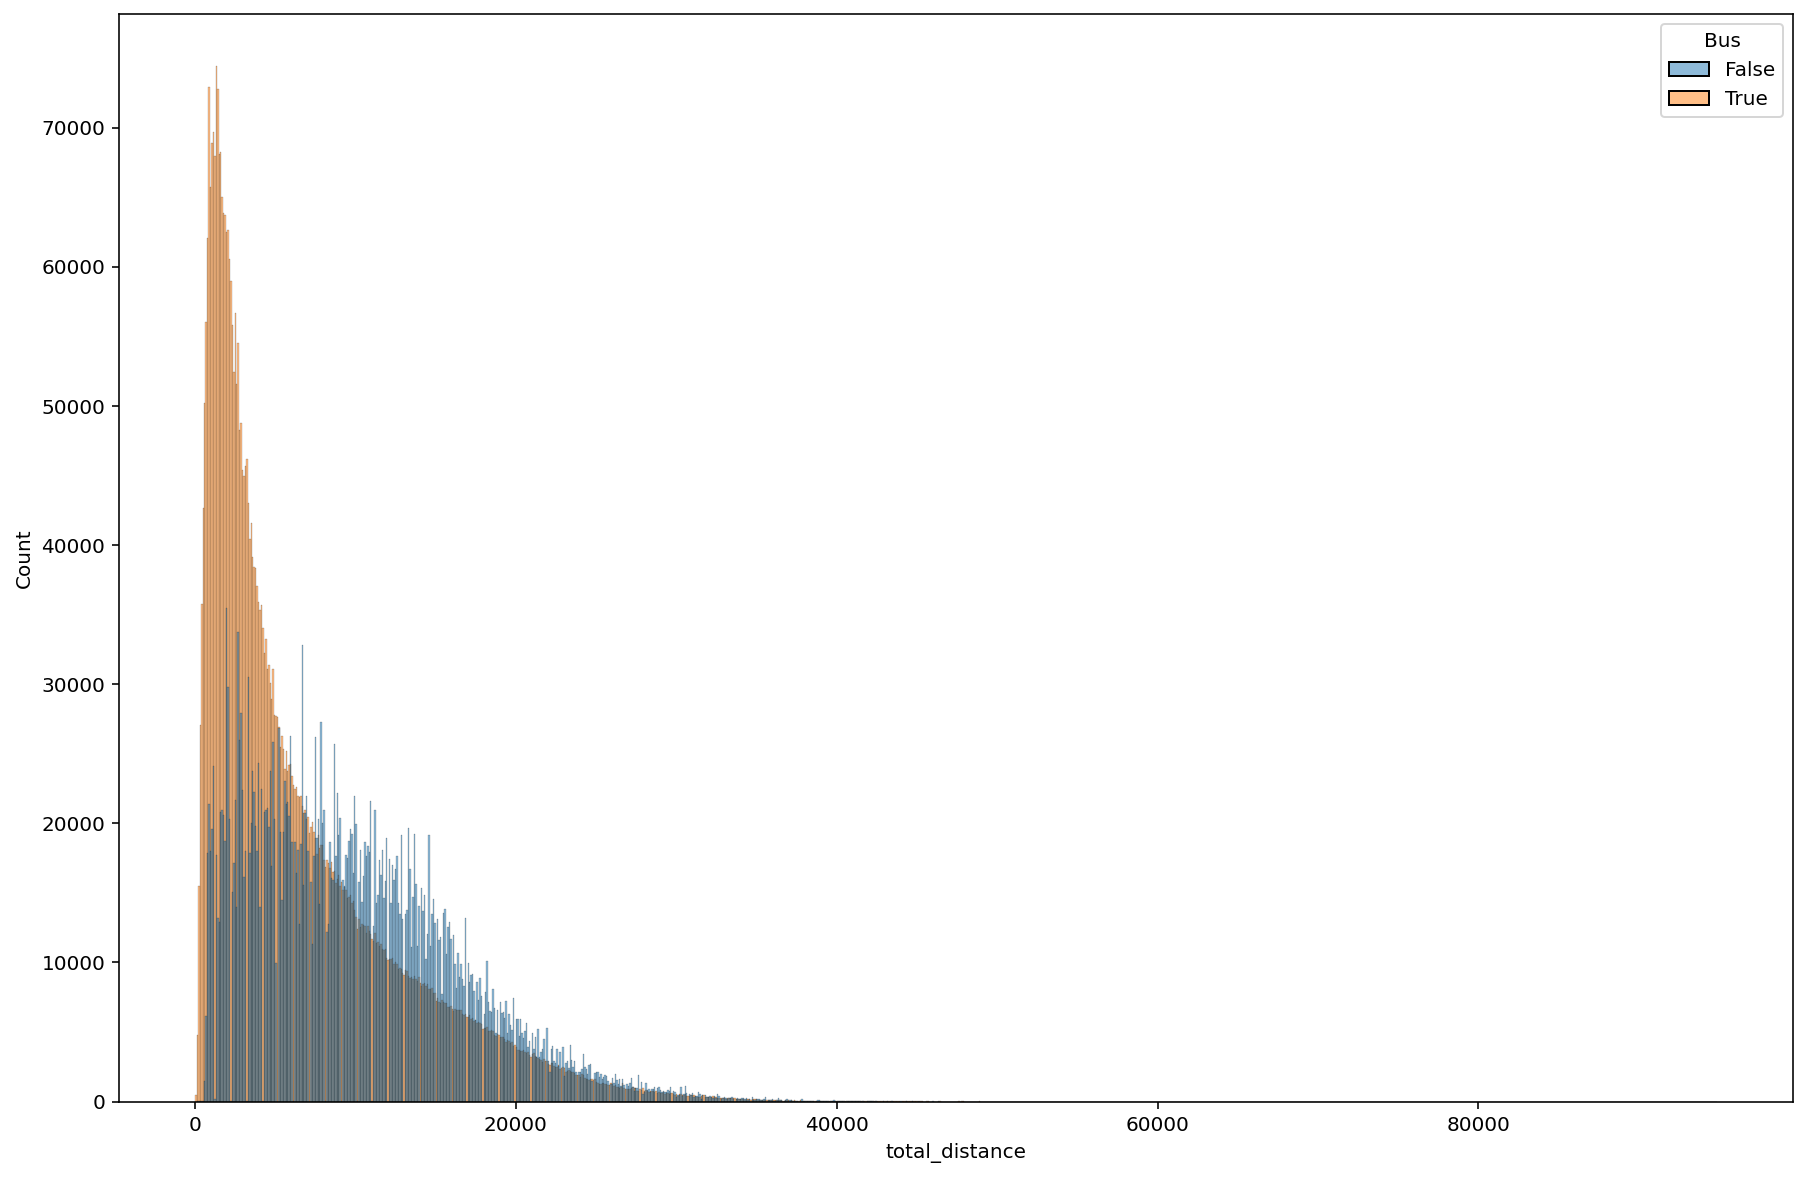

In [27]:
plt.figure(figsize = (15, 10))
sns.histplot(data =df_copy , x = 'total_distance', hue = 'Bus')

<AxesSubplot:xlabel='total_distance', ylabel='Count'>

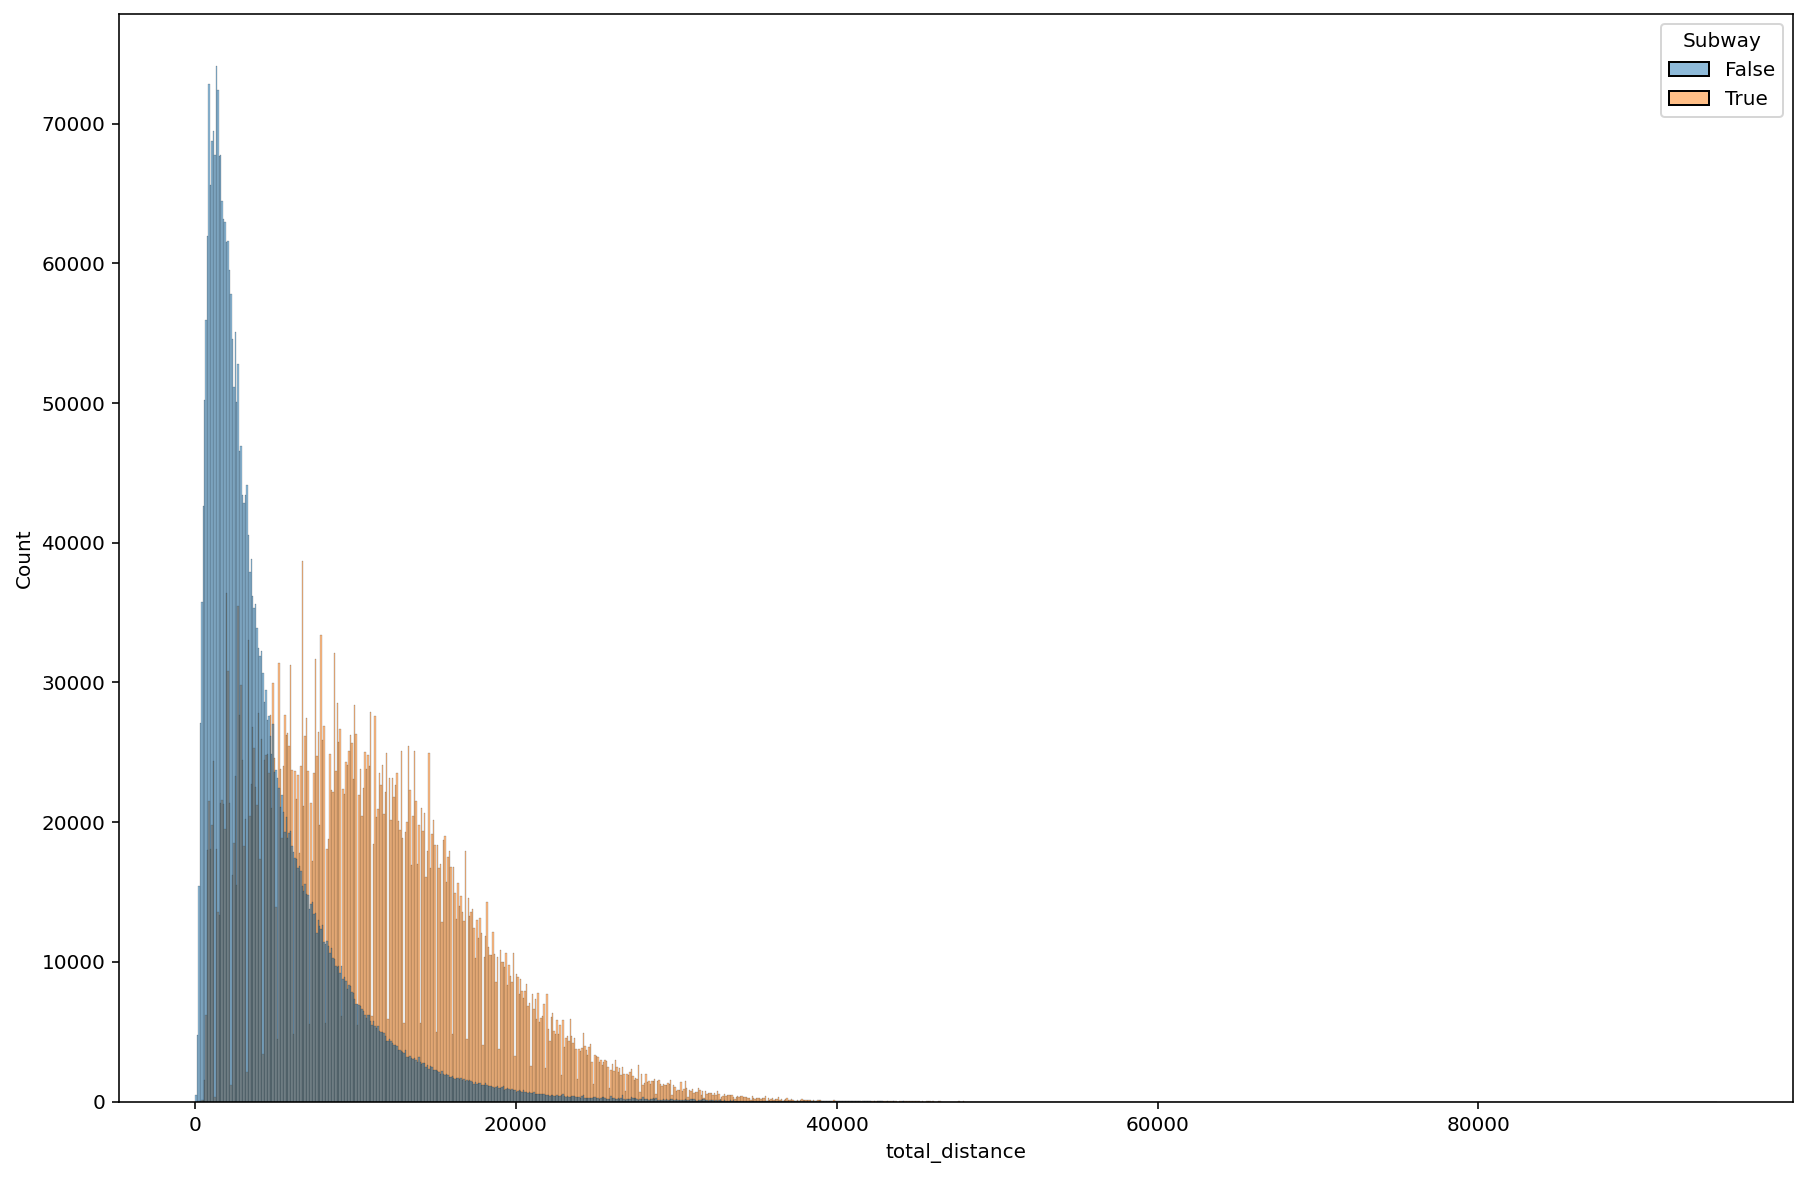

In [28]:
plt.figure(figsize = (15, 10))
sns.histplot(data =df_copy , x = 'total_distance', hue = 'Subway')

In [57]:
# 시간대 변화
# 40키로 되는 거리를 굳이 차량을 이용하지 온디맨드 서비스가 필요할까.. 비교적 가까운 거리의 이용에 사용하지 않을까,
df_copy['total_time(minute)'] = (df_copy['total_time'] // 60)
df_copy.head(5)


,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,on_time,off_time,total_time(minute)
0,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,영등포시장역,126.905118,37.522694,1119074,12,42,8,충무로역,126.993624,37.561135,1102060,13,16,20,0,11000,2052,-1.0,8897.367673,1.236321,12:42:8,13:16:20,34
1,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,충무로역,126.993624,37.561135,1102060,16,2,9,중곡역,127.084283,37.565891,1105057,16,36,50,0,9400,2081,-1.0,8008.336598,1.173777,16:2:9,16:36:50,34
2,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,중곡역,127.084283,37.565891,1105057,18,22,39,선유도역,126.893294,37.538159,1119062,19,19,46,0,20100,3427,-1.0,17116.783674,1.174286,18:22:39,19:19:46,57
3,+++19/4InCnN/eZXlK0pT7oFlp3qEbVXHX4NFSiyAN8=,True,False,LG전자.문래중,126.885883,37.520390,1119076,16,11,56,문래역,126.894412,37.519063,1119076,16,15,3,0,768,187,11110803.0,766.539891,1.001905,16:11:56,16:15:3,3
4,+++3lFnkOIxAPXhin+oeJBZJeI8l5KOhgxcjhFqGTlc=,True,False,강남구청.강남세무서,127.047293,37.518428,1123078,18,4,57,청담동래미안아파트,127.042912,37.517653,1123078,18,6,30,0,397,93,11110214.0,395.878621,1.002833,18:4:57,18:6:30,1


In [51]:
df_mintime = df_copy[(df_copy['total_time(minute)'] < 200) & (df_copy['Circuity'] < 10)]
df_mintime.shape

<AxesSubplot:xlabel='total_time(minute)', ylabel='Circuity'>

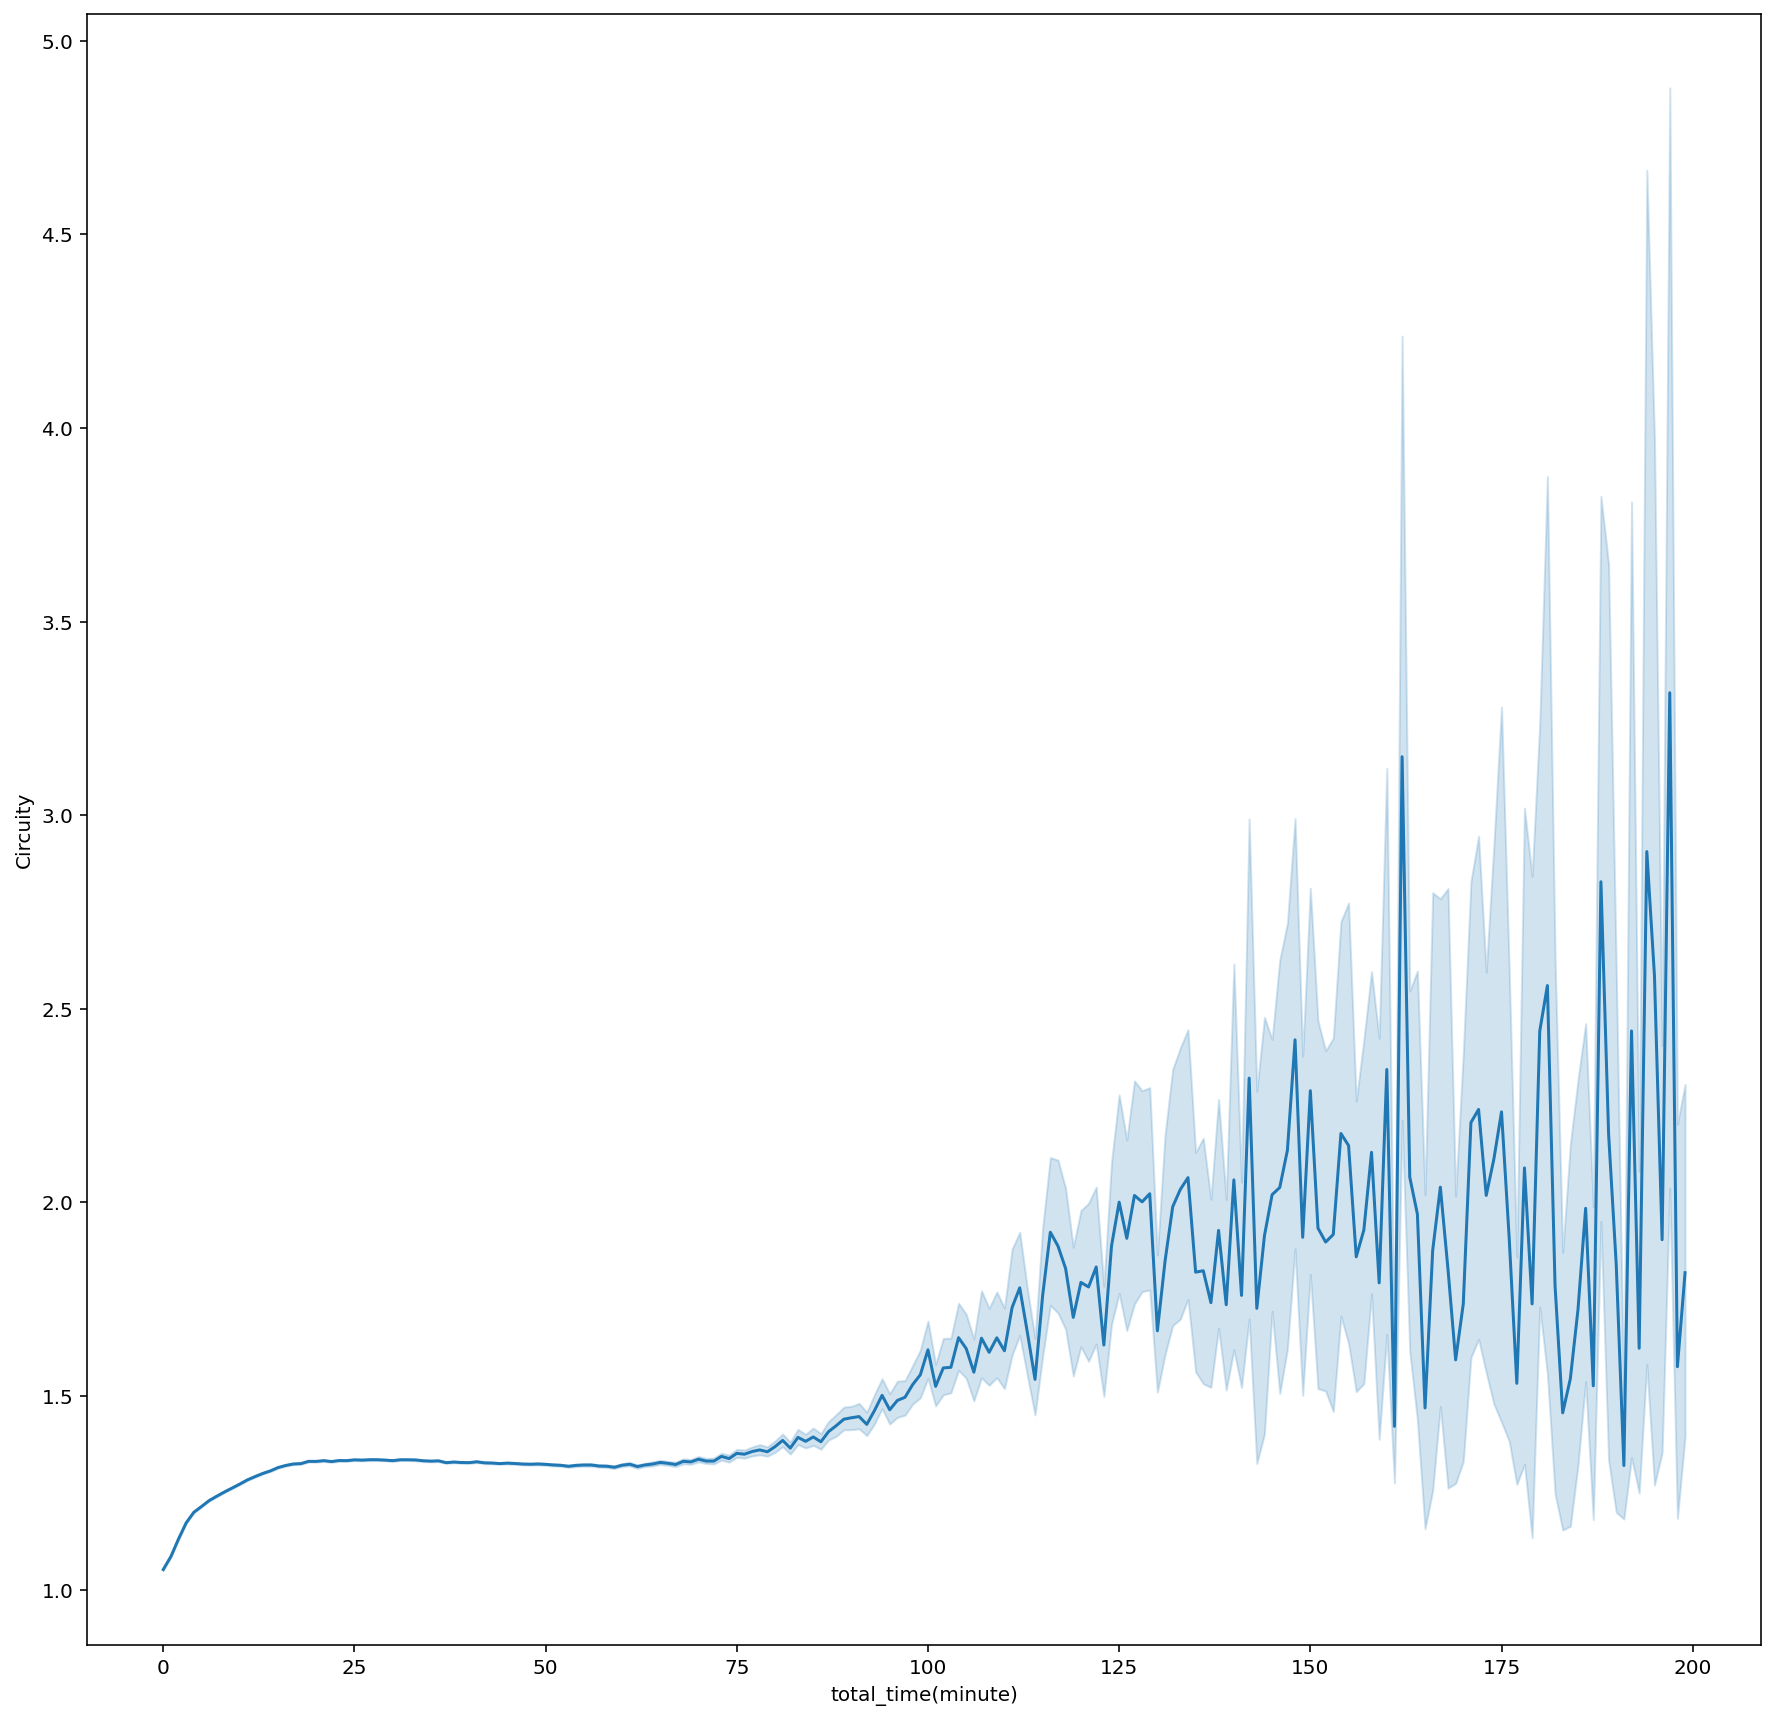

In [52]:
plt.figure(figsize = (15, 15))
sns.lineplot(data = df_mintime ,x = 'total_time(minute)',  y = 'Circuity' )

<AxesSubplot:xlabel='total_time(minute)', ylabel='Circuity'>

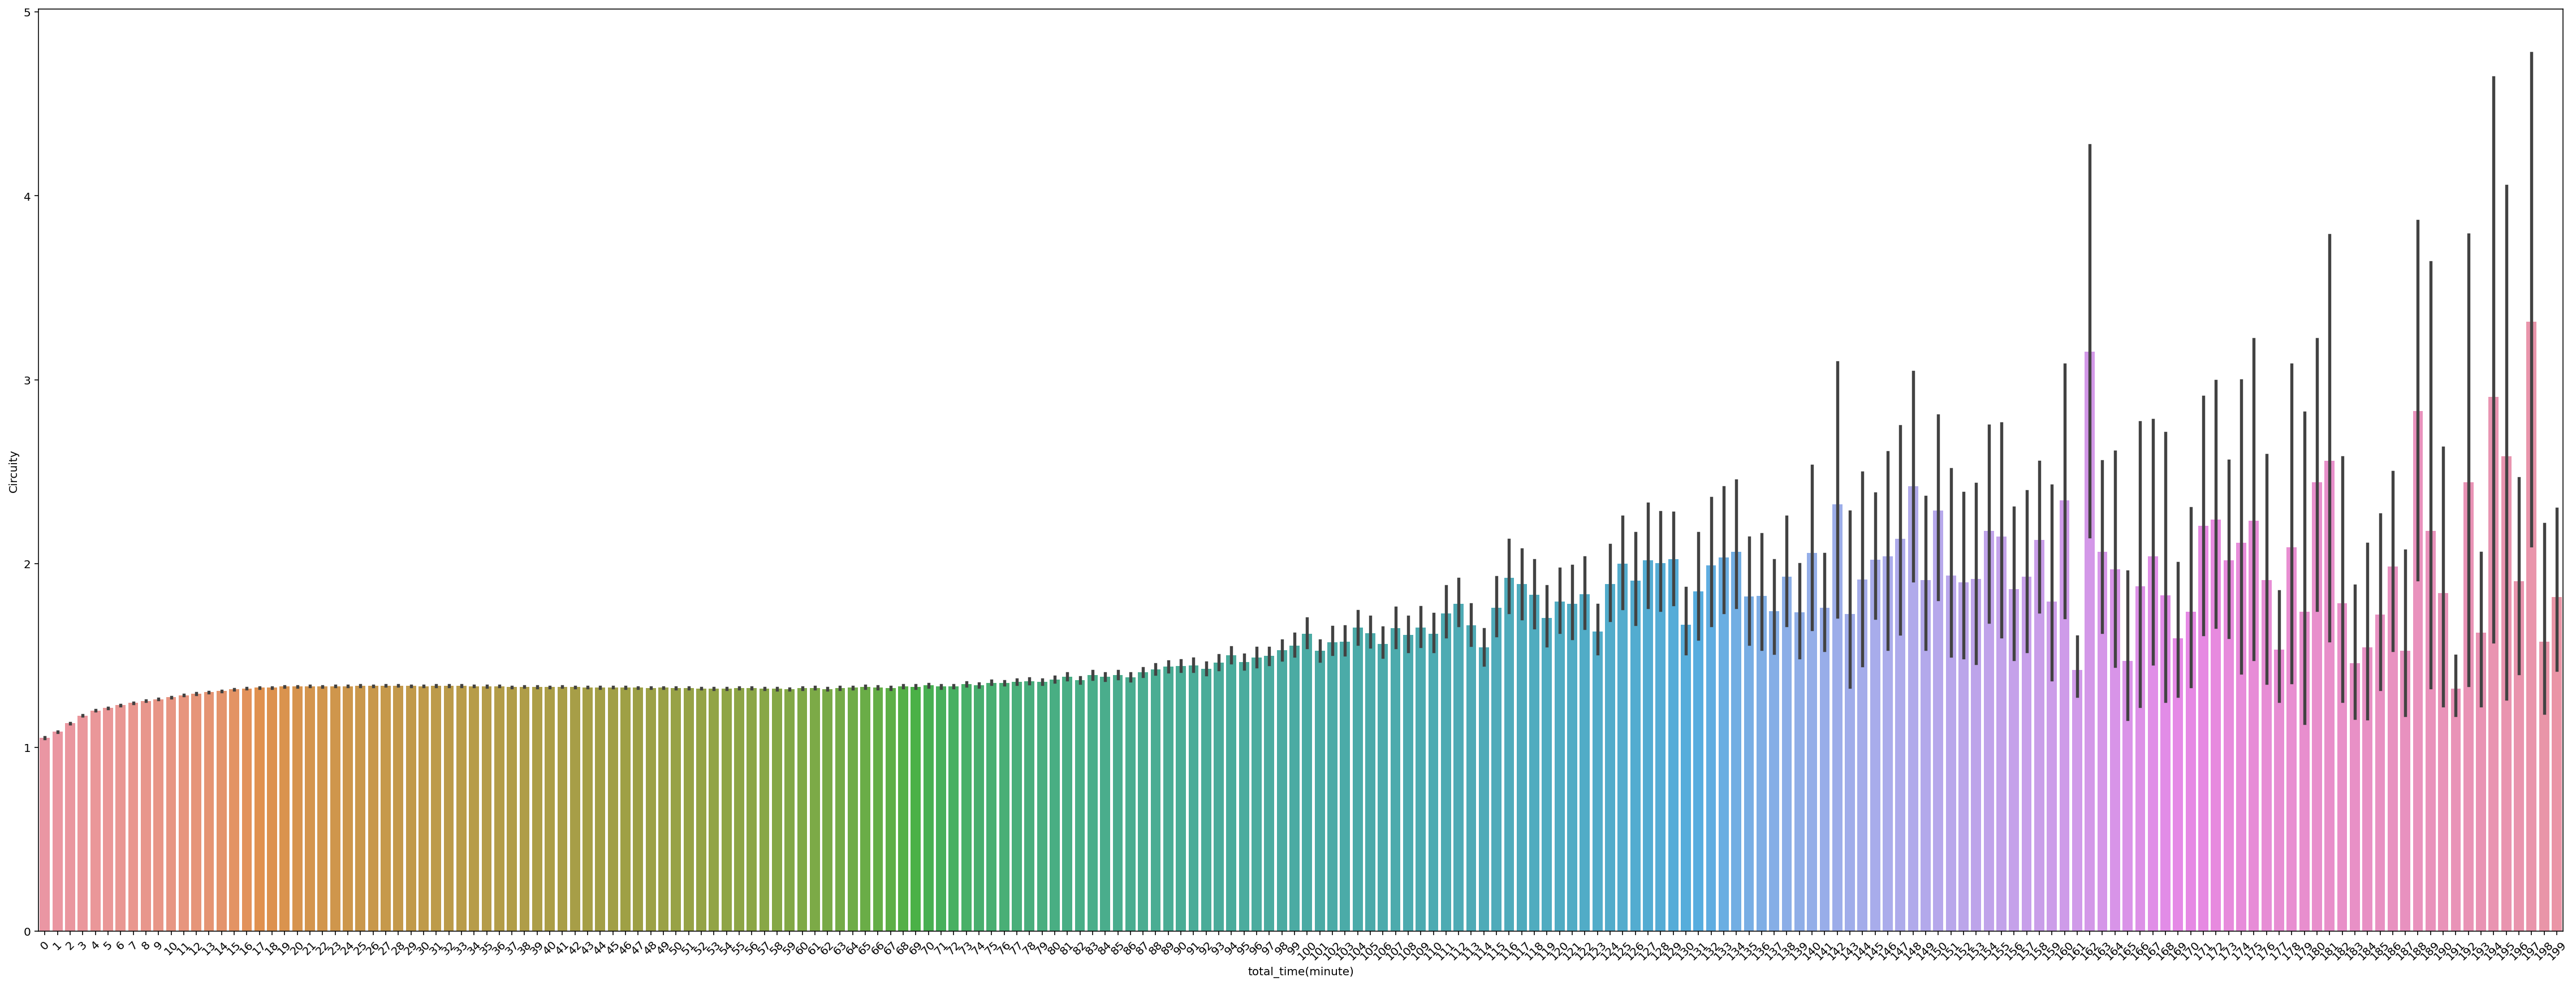

In [53]:
plt.figure(figsize = (40 , 15))
plt.xticks(rotation = 45)
sns.barplot(data = df_mintime ,x = 'total_time(minute)',  y = 'Circuity' )

In [ ]:
df_copy.corr('total_time(minute)', 'Circuity')

In [ ]:
# 평균 이동거리에 걸린 시간대비 Circuity가 차이가 있는지에 대해서 확인.
# 차량공유 서비스가 아니라, 전동킥보드, 자전거 같은 종류는 상대적으로 먼거리에 대해서 이용을 안한단 말이지.
# total distance도 5키로정도로 한정에서 줄일  수 있지 않을까? 그러면 더 줄일수있는거지

# Circuity 가 적은 곳에서는 안쓰고
# Circuity 가 큰 곳에서는 더 쓰고

In [54]:
df_mintime2 = df_copy[(df_copy['total_time(minute)'] < 60) & (df_copy['Circuity'] < 10)]
df_mintime2.shape

(7704420, 26)

<AxesSubplot:xlabel='total_time(minute)', ylabel='Circuity'>

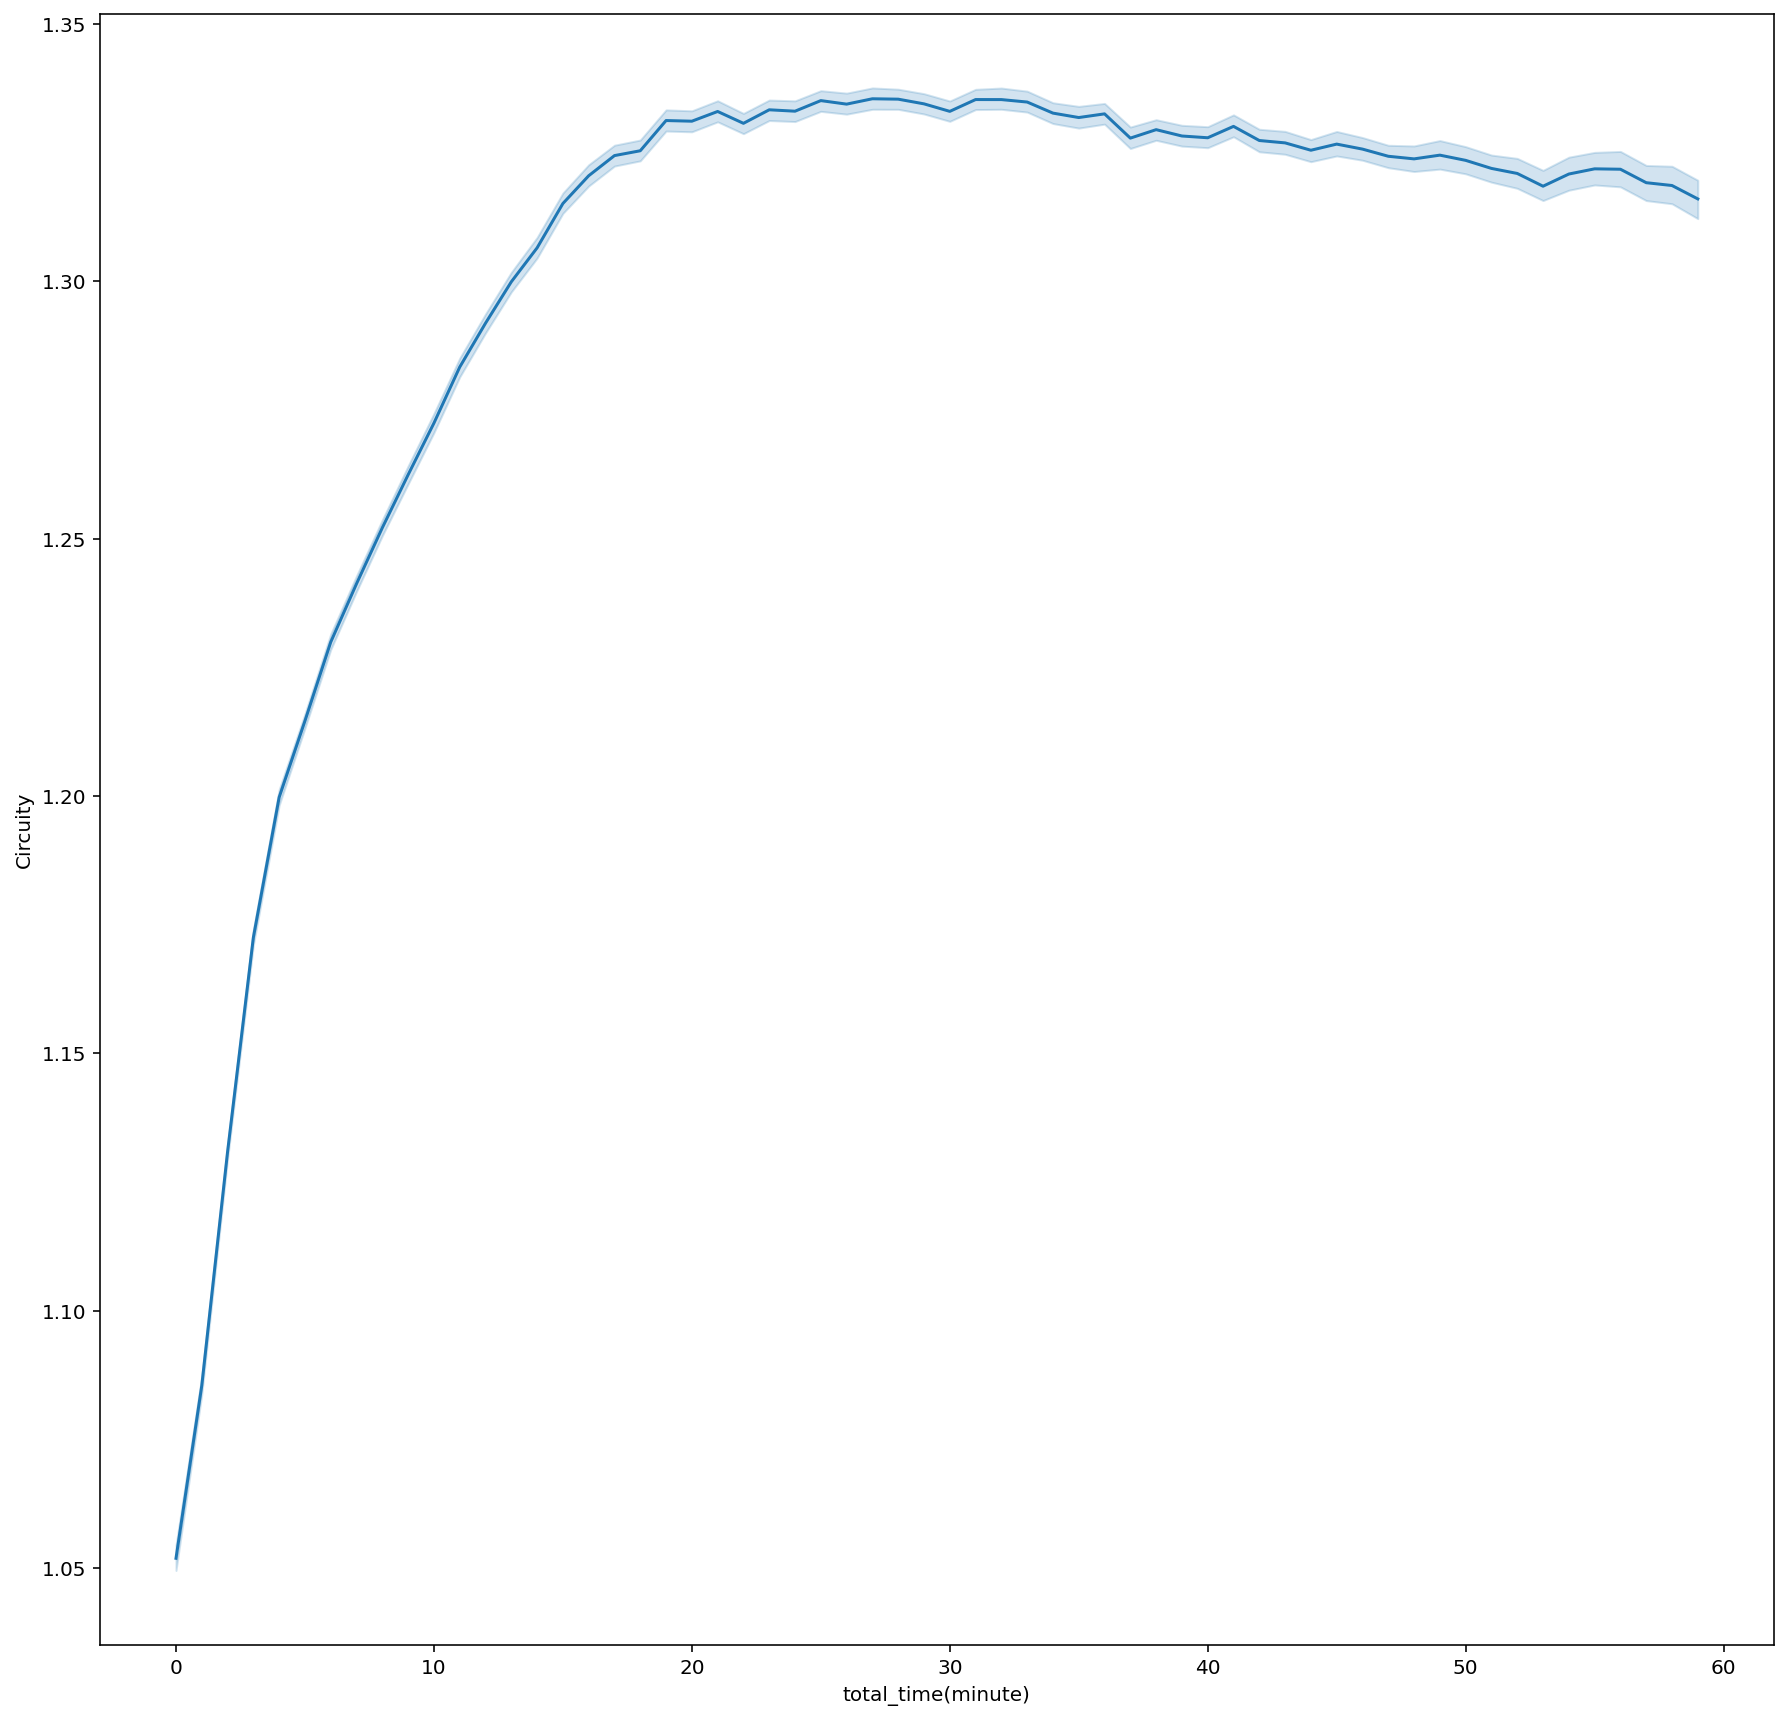

In [58]:
plt.figure(figsize = (15, 15))
sns.lineplot(data = df_mintime2 ,x = 'total_time(minute)',  y = 'Circuity' )

<AxesSubplot:xlabel='total_time(minute)', ylabel='Circuity'>

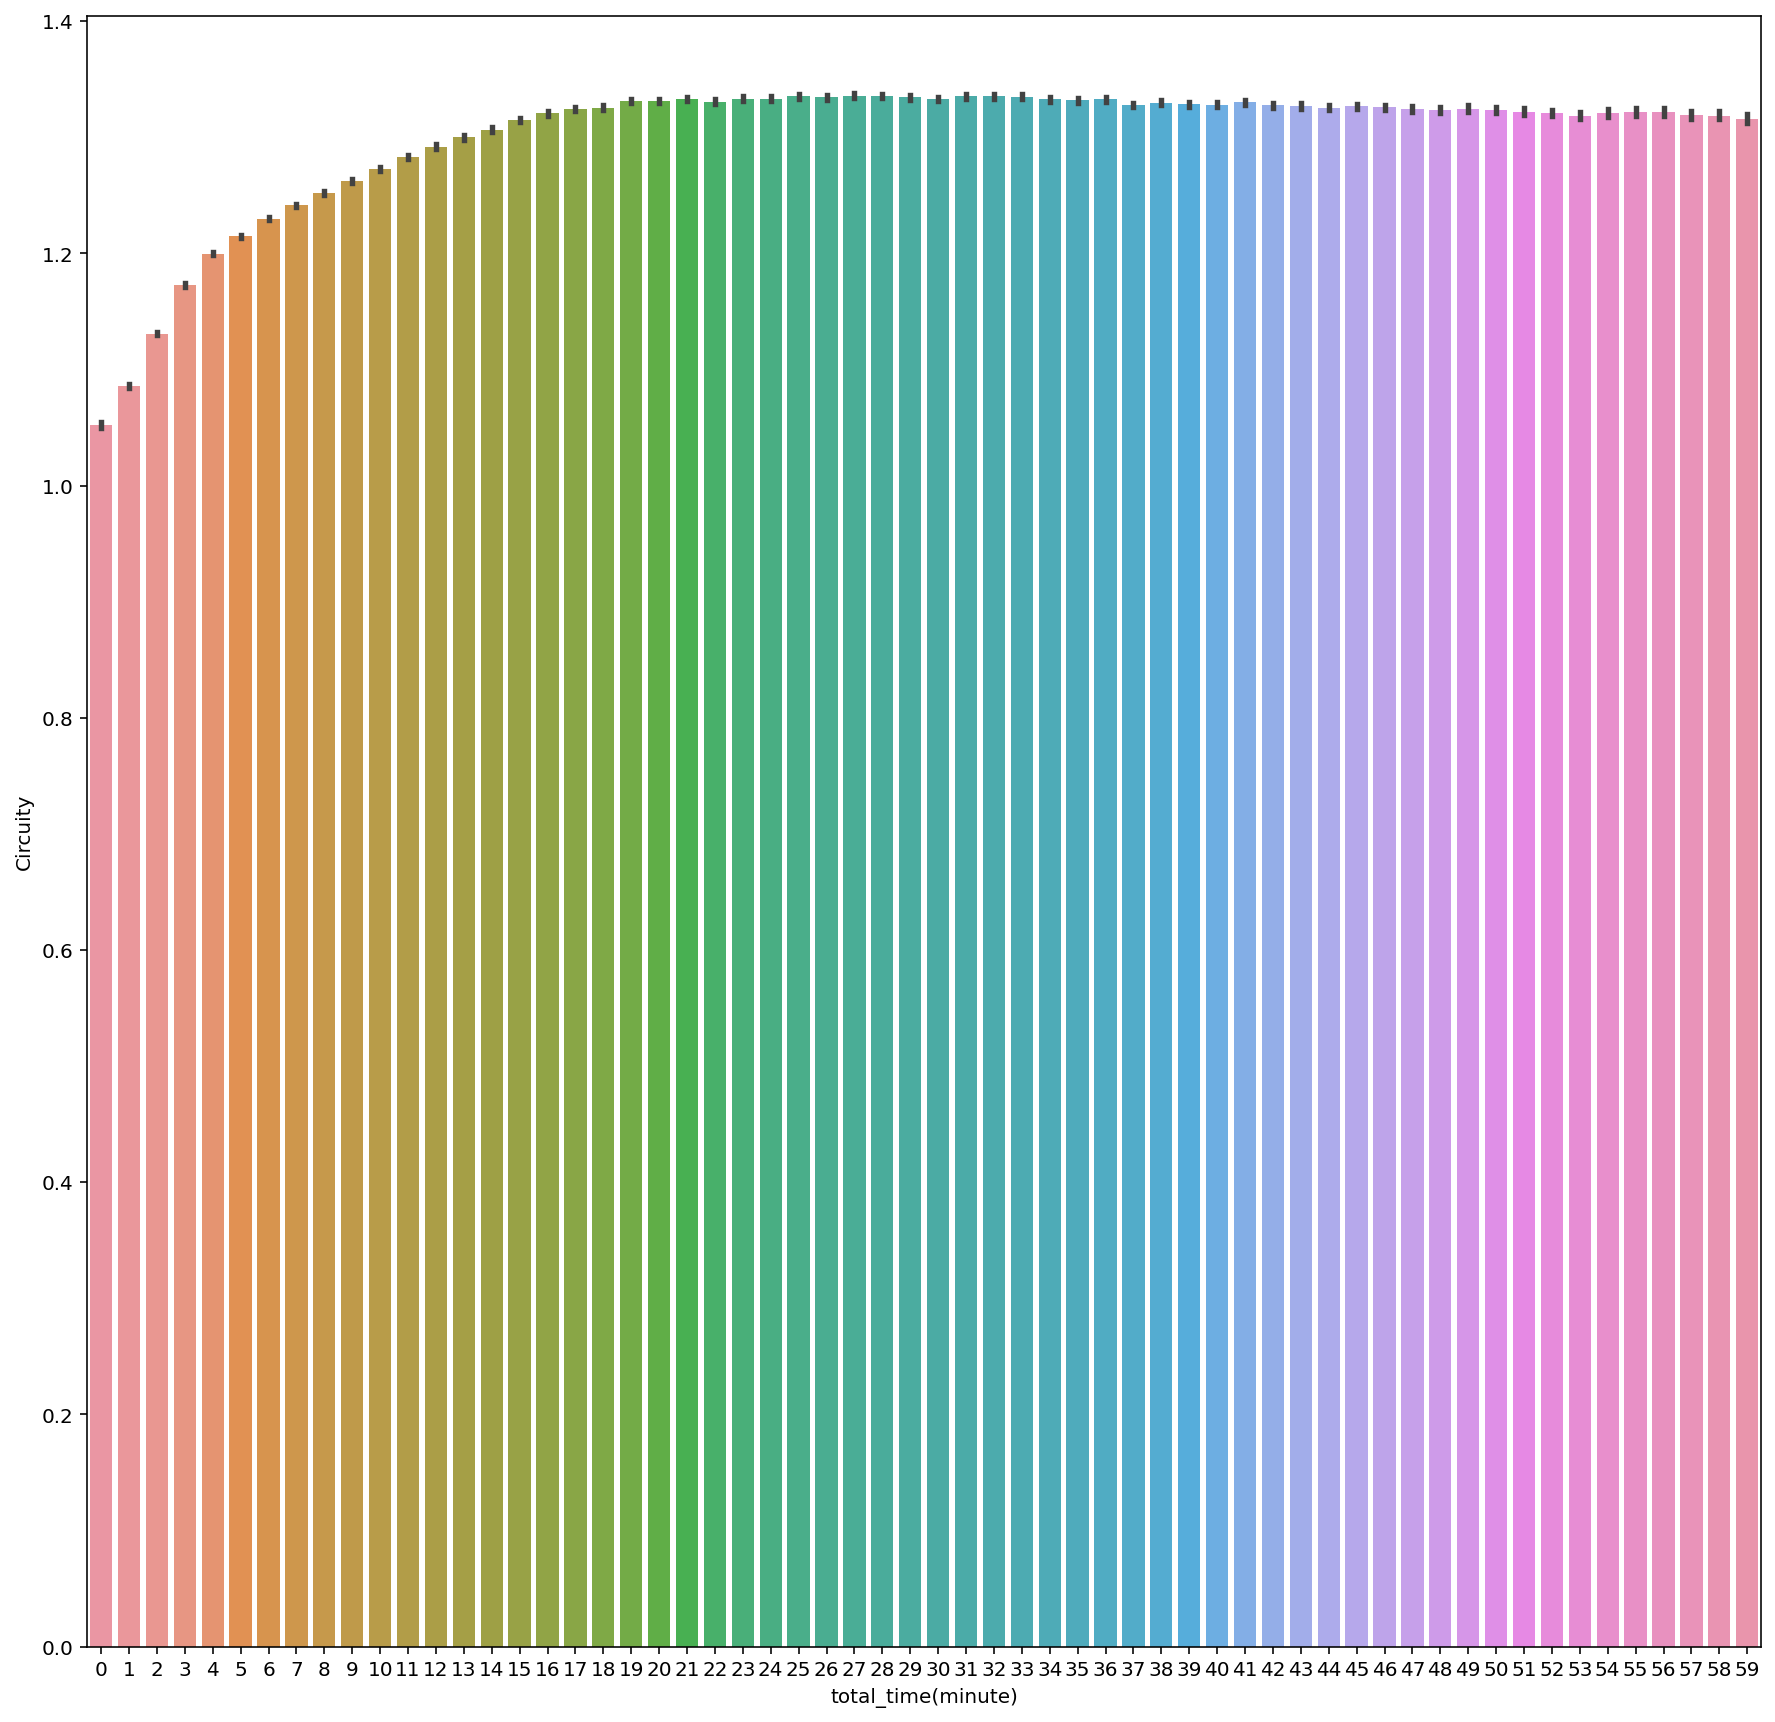

In [60]:
plt.figure(figsize = (15, 15))
sns.barplot(data = df_mintime2 ,x = 'total_time(minute)',  y = 'Circuity' )

In [63]:
df_mintime2.describe()

,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,total_time(minute)
count,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06,7.704420e+06
mean,1.269883e+02,3.754224e+01,1.208197e+06,1.382844e+01,2.873473e+01,2.953856e+01,1.269883e+02,3.754204e+01,1.206542e+06,1.406945e+01,3.022159e+01,2.950086e+01,3.315606e-01,7.315453e+03,1.382024e+03,9.301476e+06,5.800637e+03,1.297321e+00,2.254175e+01
std,8.310058e-02,5.427675e-02,4.205948e+05,5.245729e+00,1.722189e+01,1.731307e+01,8.233255e-02,5.388415e-02,4.173534e+05,5.314832e+00,1.720853e+01,1.731653e+01,5.749385e-01,5.651816e+03,8.761265e+02,1.152244e+07,4.564837e+03,3.922560e-01,1.460411e+01
min,1.267171e+02,3.730242e+01,1.101053e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.267175e+02,3.730242e+01,1.101053e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+01,0.000000e+00,-1.000000e+00,2.666394e+01,1.478277e-02,0.000000e+00
25%,1.269241e+02,3.750067e+01,1.108061e+06,9.000000e+00,1.400000e+01,1.500000e+01,1.269243e+02,3.750079e+01,1.108058e+06,9.000000e+00,1.600000e+01,1.400000e+01,0.000000e+00,2.600000e+03,6.460000e+02,-1.000000e+00,2.031436e+03,1.102818e+00,1.000000e+01
50%,1.269957e+02,3.754041e+01,1.116052e+06,1.400000e+01,2.800000e+01,3.000000e+01,1.269947e+02,3.754041e+01,1.116051e+06,1.500000e+01,3.100000e+01,3.000000e+01,0.000000e+00,5.800000e+03,1.219000e+03,1.111005e+07,4.558696e+03,1.216799e+00,2.000000e+01
75%,1.270485e+02,3.757251e+01,1.122053e+06,1.800000e+01,4.300000e+01,4.500000e+01,1.270480e+02,3.757210e+01,1.122053e+06,1.900000e+01,4.500000e+01,4.400000e+01,1.000000e+00,1.094700e+04,2.006000e+03,1.111059e+07,8.601075e+03,1.373536e+00,3.300000e+01
max,1.272336e+02,3.785594e+01,3.126056e+06,2.300000e+01,5.900000e+01,5.900000e+01,1.272335e+02,3.785591e+01,3.126056e+06,2.300000e+01,5.900000e+01,5.900000e+01,4.000000e+00,4.830000e+04,3.599000e+03,9.100003e+07,3.475929e+04,9.999299e+00,5.900000e+01


버스는 노선이 한정되어있어서 가려면 돌아가야 됨.
사람들이 어떤 곳에서 차량공유를 할까?
상대적으로 긴거리에서 오랜시간이걸리고 , 우회계수가 높은 곳을 갈때 차량공유를 하겠지
아니면 아예 버스가 안다니거나 
